# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [4]:
# parece que existem valores nulos que não fazem muito sentido, ja que é possivel ter números decimais no campo, vamos excluir os 0.
df = df.dropna()
#vamos remover algumas colunas. 
df = df.drop(['Unnamed: 0','data_ref','id_cliente'], axis=1)

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [5]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=100)

### Exercicio 2

Com base no exercicio anterior, vamos começar com o modelo mais eficiente encontrado. 

In [6]:
modelo = 'renda ~ sexo + posse_de_veiculo + C(posse_de_imovel, Treatment(1)) + qtd_filhos + C(tipo_renda, Treatment(0)) + C(educacao, Treatment(2)) + estado_civil + C(tipo_residencia, Treatment(1)) + idade+ tempo_emprego+ qt_pessoas_residencia'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_test)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    
    reg_summary = reg.summary()
    print(reg_summary)




                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.76e-220
Time:                        08:18:44   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.76e-220
Time:                        08:18:45   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.76e-220
Time:                        08:18:45   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [7]:
modelo = 'renda ~ sexo + posse_de_veiculo + C(posse_de_imovel, Treatment(1)) + qtd_filhos + C(tipo_renda, Treatment(0)) + C(educacao, Treatment(2)) + estado_civil + C(tipo_residencia, Treatment(1)) + idade+ tempo_emprego+ qt_pessoas_residencia'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_test)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    
    print(f'R² = {reg.rsquared} Adj. R² = {reg.rsquared_adj} Alpha = {i} ')




R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.001 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.005 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.01 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.05 
R² = 0.30380902063807236 Adj. R² = 0.2983876762173435 Alpha = 0.1 


Como podemos observar, todos modelos ficaram iguais, variando pouco o R² , R² ajustado e o AIC

### Exercicio 3

In [8]:
modelo = 'renda ~ sexo + posse_de_veiculo + C(posse_de_imovel, Treatment(1)) + qtd_filhos + C(tipo_renda, Treatment(0)) + C(educacao, Treatment(2)) + estado_civil + C(tipo_residencia, Treatment(1)) + idade+ tempo_emprego+ qt_pessoas_residencia'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_test)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = i)
    
    reg_summary = reg.summary()
    print(reg_summary)

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.76e-220
Time:                        08:18:47   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.76e-220
Time:                        08:18:47   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     53.80
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.76e-220
Time:                        08:18:48   Log-Likelihood:                -31733.
No. Observations:                3107   AIC:                         6.352e+04
Df Residuals:                    3082   BIC:                         6.367e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [9]:
modelo = 'renda ~ sexo + posse_de_veiculo + C(posse_de_imovel, Treatment(1)) + qtd_filhos + C(tipo_renda, Treatment(0)) + C(educacao, Treatment(2)) + estado_civil + C(tipo_residencia, Treatment(1)) + idade+ tempo_emprego+ qt_pessoas_residencia'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_test)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = i)
    
    print(f'R² = {reg.rsquared} /// Adj. R² = {reg.rsquared_adj} Alpha = {i} ')

R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.001 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.005 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.01 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.05 
R² = 0.30380902063807236 /// Adj. R² = 0.2983876762173435 Alpha = 0.1 


O melhor resultado foi com o Alpha = 0 e Alpha = 0,001, mesmo que sendo melhoras marginais

### Exercicio 4

In [10]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [11]:
#transformar booleanos em Dummies e objects em Dummies
#Poderíamos fazer assim: df_test.posse_de_veiculo = [int(x) for x in df_test.posse_de_veiculo]
#                        df_test.posse_de_imovel = [int(x) for x in df_test.posse_de_imovel]
X_step = df_test.drop('renda', axis = 1)
X_step = pd.get_dummies(df_test, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

y_step = df_test.renda

In [13]:
X_step.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 3740 to 10639
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   qtd_filhos                     3107 non-null   int64  
 1   idade                          3107 non-null   int64  
 2   tempo_emprego                  3107 non-null   float64
 3   qt_pessoas_residencia          3107 non-null   float64
 4   renda                          3107 non-null   float64
 5   sexo_M                         3107 non-null   uint8  
 6   posse_de_veiculo_True          3107 non-null   uint8  
 7   posse_de_imovel_True           3107 non-null   uint8  
 8   tipo_renda_Bolsista            3107 non-null   uint8  
 9   tipo_renda_Empresário          3107 non-null   uint8  
 10  tipo_renda_Pensionista         3107 non-null   uint8  
 11  tipo_renda_Servidor público    3107 non-null   uint8  
 12  educacao_Pós graduação         3107 non-null

In [14]:
result = stepwise_selection(X_step, y_step)
print('resulting features:')
print(result)

C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  renda                          with p-value 0.0
Add  tempo_emprego                  with p-value 1.2837e-104
Add  idade                          with p-value 8.83185e-53
Drop tempo_emprego                  with p-value 1.0
Add  posse_de_veiculo_True          with p-value 1.59187e-42
Add  educacao_Superior completo     with p-value 2.62164e-44
Add  qtd_filhos                     with p-value 2.25638e-10
Drop educacao_Superior completo     with p-value 0.641021
Add  tipo_renda_Empresário          with p-value 4.60282e-35
Add  estado_civil_Solteiro          with p-value 9.8653e-20


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  tipo_residencia_Estúdio        with p-value 2.22187e-16
Add  posse_de_imovel_True           with p-value 2.11542e-13
Drop tipo_residencia_Estúdio        with p-value 0.42975
Add  tipo_renda_Servidor público    with p-value 5.03622e-07
Add  sexo_M                         with p-value 4.39594e-10


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  tempo_emprego                  with p-value 4.02325e-07
Drop sexo_M                         with p-value 0.917888
Add  educacao_Secundário            with p-value 5.53865e-15
Drop posse_de_imovel_True           with p-value 0.074403
Add  posse_de_imovel_True           with p-value 3.84156e-05
Drop estado_civil_Solteiro          with p-value 1.0
Add  tipo_residencia_Casa           with p-value 4.3695e-17
Drop tipo_renda_Servidor público    with p-value 0.319187


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  qt_pessoas_residencia          with p-value 1.22865e-10
Drop tipo_residencia_Casa           with p-value 0.964819
Add  estado_civil_Separado          with p-value 2.10211e-11
Drop idade                          with p-value 0.487975
Add  tipo_residencia_Casa           with p-value 6.57361e-16
Drop educacao_Secundário            with p-value 0.434444


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  educacao_Superior completo     with p-value 2.63018e-29
Drop tipo_residencia_Casa           with p-value 0.137052
Add  educacao_Secundário            with p-value 0.00218622
Drop posse_de_veiculo_True          with p-value 1.0
Add  posse_de_veiculo_True          with p-value 1.41844e-12
Drop educacao_Secundário            with p-value 0.50413
Add  tipo_residencia_Estúdio        with p-value 3.51717e-05


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  idade                          with p-value 3.31688e-08
Drop estado_civil_Separado          with p-value 1.0
Add  estado_civil_Solteiro          with p-value 5.24644e-11
Drop qt_pessoas_residencia          with p-value 0.929846
Add  qt_pessoas_residencia          with p-value 4.23098e-14
Drop tipo_residencia_Estúdio        with p-value 0.512388
Add  estado_civil_União             with p-value 0.0058741
Drop educacao_Superior completo     with p-value 0.741257


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  tipo_renda_Servidor público    with p-value 2.20401e-10
Drop estado_civil_União             with p-value 0.652752
Add  sexo_M                         with p-value 0.000242815
Drop tipo_renda_Empresário          with p-value 0.518833
Add  tipo_residencia_Com os pais    with p-value 1.09843e-06
Add  educacao_Superior completo     with p-value 2.74985e-06
Drop posse_de_veiculo_True          with p-value 0.737942


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  tipo_residencia_Governamental  with p-value 3.10666e-29
Drop sexo_M                         with p-value 0.620891
Add  tipo_residencia_Estúdio        with p-value 4.33368e-16
Drop tempo_emprego                  with p-value 1.0
Add  tempo_emprego                  with p-value 4.92614e-05
Drop estado_civil_Solteiro          with p-value 0.934498
Add  estado_civil_União             with p-value 0.00145113
Drop posse_de_imovel_True           with p-value 0.751596


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  posse_de_imovel_True           with p-value 6.09316e-09
Drop tipo_residencia_Com os pais    with p-value 0.810342
Add  tipo_renda_Empresário          with p-value 1.37084e-10
Drop tipo_residencia_Governamental  with p-value 0.781801
Add  estado_civil_Separado          with p-value 1.0921e-17
Drop tipo_residencia_Estúdio        with p-value 0.55883
Add  educacao_Secundário            with p-value 0.00196589
Drop posse_de_imovel_True           with p-value 1.0


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  tipo_residencia_Casa           with p-value 5.85463e-09
Drop estado_civil_União             with p-value 0.321571
Add  tipo_residencia_Governamental  with p-value 3.34477e-05
Drop qtd_filhos                     with p-value 0.11506
Add  tipo_residencia_Estúdio        with p-value 0.00655413
Drop qt_pessoas_residencia          with p-value 0.7386
Add  qt_pessoas_residencia          with p-value 5.98443e-20
Drop tipo_renda_Empresário          with p-value 0.515778


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  sexo_M                         with p-value 2.20736e-36
Drop tipo_residencia_Casa           with p-value 0.527689
Add  estado_civil_Solteiro          with p-value 4.02389e-34
Drop estado_civil_Separado          with p-value 0.635069
Add  educacao_Superior incompleto   with p-value 5.78117e-05
Drop educacao_Secundário            with p-value 0.793805
Drop tipo_residencia_Estúdio        with p-value 0.873362


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  estado_civil_Separado          with p-value 8.79406e-11
Drop tipo_residencia_Governamental  with p-value 1.0
Add  tipo_residencia_Com os pais    with p-value 9.02858e-09
Add  tipo_renda_Empresário          with p-value 1.57993e-08
Drop estado_civil_Solteiro          with p-value 0.67702
Add  estado_civil_Viúvo             with p-value 0.00149786
Drop qt_pessoas_residencia          with p-value 0.932743


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  posse_de_imovel_True           with p-value 2.74176e-16
Drop estado_civil_Viúvo             with p-value 0.0760659
Add  estado_civil_Solteiro          with p-value 3.08795e-18
Drop educacao_Superior incompleto   with p-value 0.728816
Add  posse_de_veiculo_True          with p-value 1.00657e-13
Drop idade                          with p-value 1.0
Add  qtd_filhos                     with p-value 6.28263e-14
Drop tipo_residencia_Com os pais    with p-value 0.796432


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype exp

Add  idade                          with p-value 0.000182947
resulting features:
['renda', 'tipo_renda_Servidor público', 'educacao_Superior completo', 'tempo_emprego', 'sexo_M', 'estado_civil_Separado', 'tipo_renda_Empresário', 'posse_de_imovel_True', 'estado_civil_Solteiro', 'posse_de_veiculo_True', 'qtd_filhos', 'idade']


C:\Users\eric_\AppData\Local\Temp\ipykernel_26372\1577308074.py:24: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


### A melhor regressão seria com: ['renda', 'tipo_renda_Servidor público', 'educacao_Superior completo', 'tempo_emprego', 'sexo_M', 'estado_civil_Separado', 'tipo_renda_Empresário', 'posse_de_imovel_True', 'estado_civil_Solteiro', 'posse_de_veiculo_True', 'qtd_filhos', 'idade']

In [36]:
reg_stepwise = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step[['tipo_renda_Servidor público', 'educacao_Superior completo', 'tempo_emprego', 'sexo_M', 'estado_civil_Separado', 'tipo_renda_Empresário', 'posse_de_imovel_True', 'estado_civil_Solteiro', 'posse_de_veiculo_True', 'qtd_filhos', 'idade']]))).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          7.93e-232
Time:                        08:40:32   Log-Likelihood:                -31737.
No. Observations:                3107   AIC:                         6.350e+04
Df Residuals:                    3095   BIC:                         6.357e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -3744.0674    660.748     -5.666      0.000   -5039.617   -2448.518
tipo_renda_Servidor público   753.4287    406.004      1.856      0.064     -42.635    1549.493
educacao_Superior completo   1241.4409    248.138      5.003      0.000     754.910    1727.972
tempo_emprego                 516.5966     19.235     26.857      0.000     478.882     554.311
sexo_M                       5912.8166    267.247     22.125      0.000    5388.816    6436.817
estado_civil_Separado         -69.1403    537.054     -0.129      0.898   -1122.158     983.877
tipo_renda_Empresário        1068.5885    273.026      3.914      0.000     533.258    1603.919
posse_de_imovel_True          563.6051    254.870      2.211      0.027      63.873    1063.337
estado_civil_Solteiro        -195.0047    371.218     -0.525      0.599    -922.863     532.854
posse_de_veiculo_True        -116.6578    258.197     -0.452      0.651    -622.912     389.597
qtd_filhos                    663.3895    163.953      4.046      0.000     341.921     984.858
idade                          55.0206     14.404      3.820      0.000      26.778      83.263
==============================================================================
Omnibus:                     3015.995   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234527.545
Skew:                           4.494   Prob(JB):                         0.00
Kurtosis:                      44.603   Cond. No.                         243.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercício 5

#### Todos os modelos de regressão são muito similares em relação aos resultados tanto analisando R²-ajustado quanto o AIC, porém usando o stepwise podemos garantir que analisamos o maior número de combinação de variáveis possível, usaria ele para começar e depois tentaria fazer uma análise elástica com as variáveis definidas pelo modelo.

### Exercicio 6

In [15]:
modelo = 'np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + idade + tempo_emprego + 1'

alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = df_test)
    reg = md.fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    
    print(f'R² = {reg.rsquared} Adj. R² = {reg.rsquared_adj} Alpha = {i} ')




R² = 0.3537907682461804 Adj. R² = 0.3527488314003987 Alpha = 0 
R² = 0.3537907682461804 Adj. R² = 0.3527488314003987 Alpha = 0.001 
R² = 0.3537907682461804 Adj. R² = 0.3527488314003987 Alpha = 0.005 
R² = 0.3537907682461804 Adj. R² = 0.3527488314003987 Alpha = 0.01 
R² = 0.3537907682461804 Adj. R² = 0.3527488314003987 Alpha = 0.05 
R² = 0.3537907682461804 Adj. R² = 0.3527488314003987 Alpha = 0.1 


### Exercicio 7

In [16]:
# Vamos fazer exatamente o que fizemos com o X-step e y_step, porem com o df todo, depois vamos epara. 

X_tree = df.drop('renda', axis = 1)
X_tree = pd.get_dummies(df, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

y_tree = df.renda

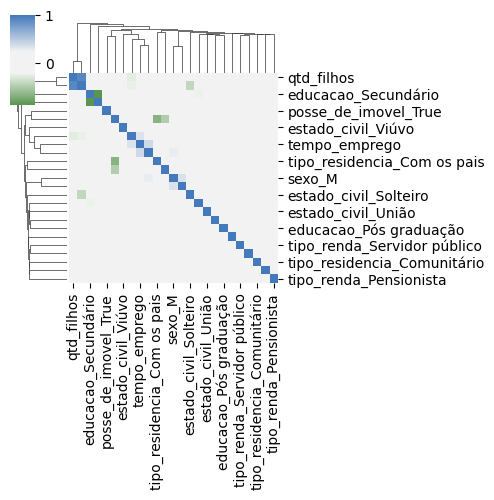

In [17]:
cmap = sns.diverging_palette(h_neg=125
                             , h_pos=250
                             , as_cmap=True
                             , sep = 60
                             , center = 'light')

sns.clustermap(X_tree.corr(), figsize=(5, 5), center = 0, cmap=cmap)

In [18]:
#pela matriz de correlação vamos filtrar mais os dados:
X_tree = X_tree.drop(['tipo_renda_Pensionista',
                      'tipo_residencia_Comunitário',
                      'tipo_renda_Servidor público',
                      'educacao_Pós graduação',
                      'estado_civil_União'], axis = 1)


In [19]:
# Como X e y ja estão separados entre a variavel Target e o resto, não precisamos aplicar o .drop( [])
X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.25, random_state=100)

n_minimo,2,3,4,5,6,7,8,9
profundidade,,,,,,,,
3,0.949013,0.949013,0.949013,0.949013,0.949013,0.948430,0.939038,0.941493
4,0.987939,0.987939,0.988090,0.988090,0.987991,0.986196,0.976804,0.979259
5,0.996837,0.996837,0.996988,0.996988,0.996713,0.994918,0.985527,0.987982
6,0.998988,0.998967,0.999082,0.999085,0.998778,0.996882,0.987511,0.989968
7,0.999582,0.999510,0.999594,0.999573,0.999262,0.997334,0.987961,0.990406
8,0.999733,0.999640,0.999720,0.999688,0.999376,0.997440,0.988064,0.990508


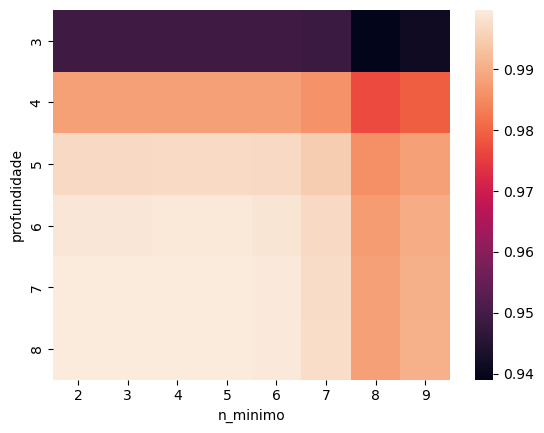

In [20]:
mses = []
ind_i = [] # Profundidade
ind_j = [] # Folhas

for i in range(3, 9):
    for j in range(2, 10):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        mse1 = regr_1.score(X_test, y_test)
        mses.append(mse1)
        ind_i.append(i)
        ind_j.append(j)
        
df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')

In [31]:
reg = DecisionTreeRegressor(max_depth=7, min_samples_leaf=5, ccp_alpha=0 )

reg.fit(X_train, y_train)

R_sqr1 = reg.score(X_test, y_test)
R_sqr1

0.9995730632991794

In [24]:
path = reg.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 3.38933266e+02, 3.61511336e+02, 4.46733700e+02,
        4.93673099e+02, 4.94386360e+02, 5.41122235e+02, 5.85563395e+02,
        6.31163834e+02, 6.72391998e+02, 6.75589570e+02, 6.78222958e+02,
        7.00044096e+02, 7.00474860e+02, 7.08246751e+02, 7.25846041e+02,
        7.52245291e+02, 7.79439597e+02, 7.98648134e+02, 8.09718284e+02,
        8.19514646e+02, 8.36884937e+02, 8.47057333e+02, 8.70781340e+02,
        8.81364985e+02, 9.35732132e+02, 9.49455954e+02, 1.00697761e+03,
        1.01722597e+03, 1.04462540e+03, 1.07049296e+03, 1.08182462e+03,
        1.09834570e+03, 1.13540306e+03, 1.25327199e+03, 1.35485546e+03,
        1.36318689e+03, 2.06882918e+03, 2.49066674e+03, 2.98833143e+03,
        3.83652441e+03, 5.01084974e+03, 5.34878606e+03, 5.71842819e+03,
        5.80891826e+03, 5.85314427e+03, 5.95946209e+03, 6.09012545e+03,
        6.28128260e+03, 6.79741198e+03, 6.95678958e+03, 7.19783063e+03,
        7.24404794e+03, 7.61478783e+03, 7.67872966

In [25]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [26]:
mse_values = []

for clf in clfs:
  mse = mean_squared_error(y_test, clf.predict(X_test))

  # Armazenar o valor de MSE na lista
  mse_values.append(mse)

In [27]:
print(mse_values)

[3829.7428226585066, 16449.603186650664, 15667.8228979899, 16356.83510045381, 19308.027950173513, 19308.027950173513, 21213.388395762686, 23520.70293637794, 25717.73712821543, 26862.191352268972, 26862.191352268972, 27622.638396041122, 29005.626012879187, 29534.318568321392, 30585.166182535933, 31278.248830753102, 32647.614804278837, 33981.75819583951, 35050.00111014779, 35050.00111014779, 35934.443344388645, 36396.689564407876, 38109.08701725098, 38916.50821466767, 38916.50821466767, 42612.604061400285, 42612.604061400285, 44742.67195396196, 44742.67195396196, 45768.83092019755, 46772.842475604986, 48808.04441793734, 49423.80886607679, 49423.80886607679, 50480.113552678406, 51795.06285077928, 52630.240632302965, 57440.452623822006, 60602.54995743354, 60602.54995743354, 66169.77712971948, 66169.77712971948, 84006.7736456824, 89518.64519430009, 89518.64519430009, 96539.68857300651, 100473.8557449316, 113420.92709898605, 119484.9762480928, 127601.00192373905, 127601.00192373905, 141144.4

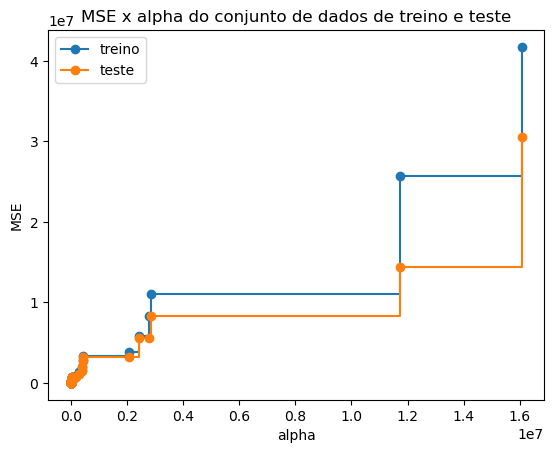

In [28]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [29]:
# achar o melhor MSE e Alpha fazendo um df
alpha_mse = pd.DataFrame ({'alpha': ccp_alphas.tolist(), 'MSE': test_scores})

In [30]:
menor_mse = np.inf
melhor_ccp = 0

for i, mse in enumerate(alpha_mse['MSE']):
  if mse <= menor_mse:  
    menor_mse = mse
    melhor_ccp = alpha_mse['alpha'][i]

print(f'O CCP_ALPHA para o menor MSE é {melhor_ccp} e o MSE é {menor_mse}.')


O CCP_ALPHA para o menor MSE é 0.0 e o MSE é 3829.7428226585066.


In [32]:
# aqui foi usando uma função do pacote "from sklearn.metrics import mean_squared_error"
mse_1 = mean_squared_error(y_test, reg.predict(X_test))
print("MSE:", mse_1)

MSE: 26688.998295295016


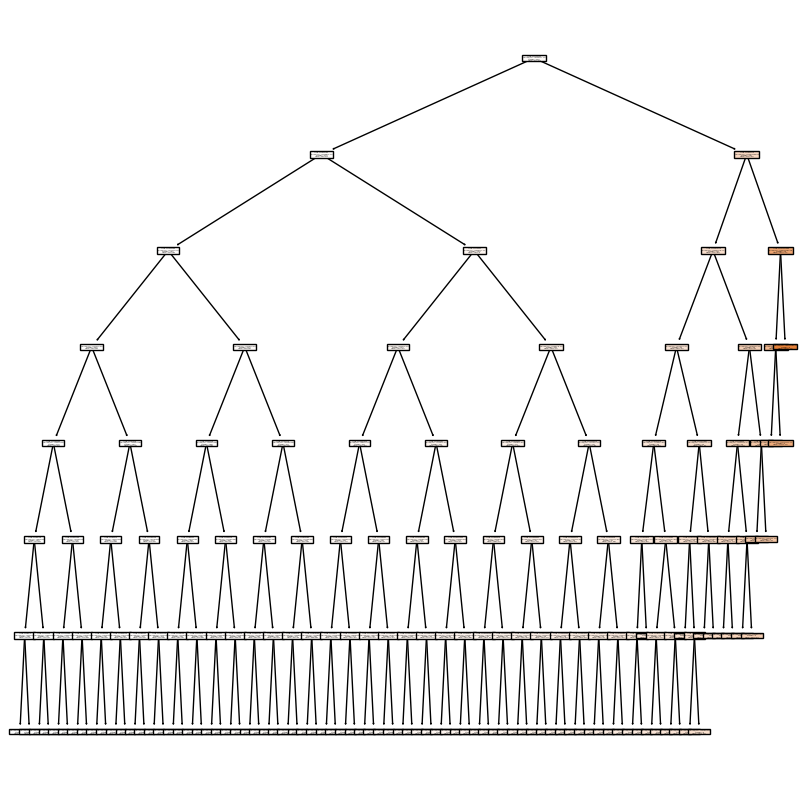

In [33]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(reg, 
                    feature_names=X_tree.columns,  
                    filled=True) 